# ML Stock Predictor

A machine learning model to predict stock prices using historical data.

In [31]:
# Upgrade yfinance if needed
import subprocess
import sys

try:
    import yfinance as yf
    if yf.__version__ < '0.2.40':
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'yfinance'])
        print('Upgraded yfinance. Please restart kernel.')
except:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yfinance'])
    print('Installed yfinance. Please restart kernel.')

In [32]:
# Essential imports
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(f'yfinance version: {yf.__version__}')

yfinance version: 0.2.65


In [33]:
# Configuration
STOCK_SYMBOL = 'AAPL'
PERIOD = '5d'  # Use shorter period that works

In [34]:
# Load stock data
data = yf.download(STOCK_SYMBOL, period='1y', progress=False)
print(f'Data shape: {data.shape}')
data.head()

Data shape: (251, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-08-29,228.725494,231.841000,227.819721,229.034071,51906300
2024-08-30,227.939163,229.332672,226.426200,229.123653,52990800
2024-09-03,221.738037,227.939173,220.145443,227.491260,50190600
2024-09-04,219.826935,220.752619,216.472536,220.633180,43840200
2024-09-05,221.349838,224.435469,220.493822,220.603313,36615400


In [35]:
# Simple feature engineering for small dataset
data['Price_Change'] = data['Close'].pct_change()
data['Target'] = data['Close'].shift(-1)
data = data.dropna()
print(f'Data after preprocessing: {data.shape}')

Data after preprocessing: (249, 7)


In [36]:
# Basic model with minimal features
if len(data) > 2:
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change']
    X = data[features]
    y = data['Target']
    
    model = RandomForestRegressor(n_estimators=10, random_state=42)
    model.fit(X[:-1], y[:-1])  # Use all but last row
    
    prediction = model.predict(X[-1:])  # Predict last row
    actual = y.iloc[-1]
    
    print(f'Predicted: {prediction[0]:.2f}')
    print(f'Actual: {actual:.2f}')
else:
    print('Not enough data for prediction')

Predicted: 229.75
Actual: 232.89


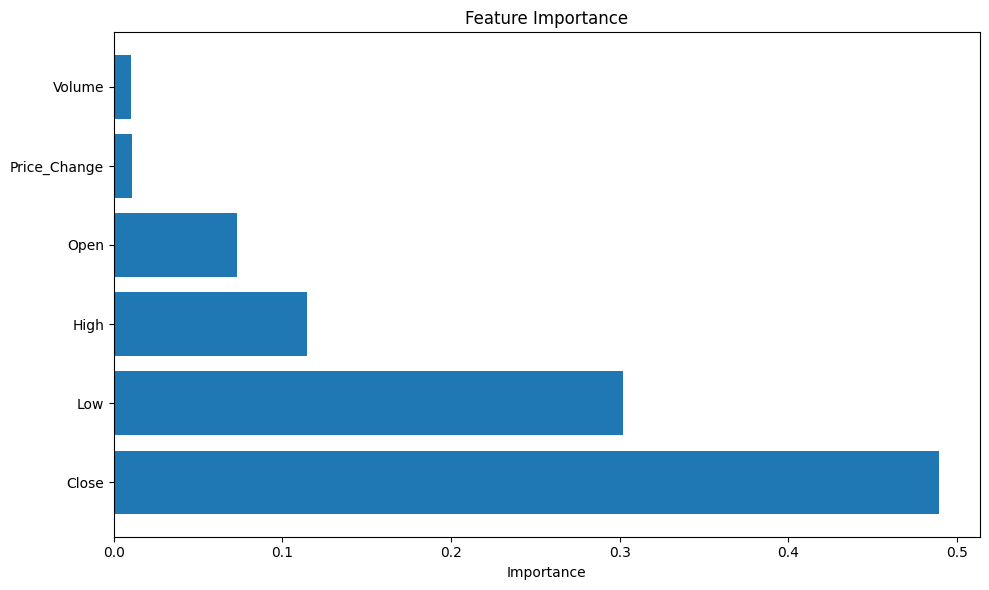

        feature  importance
3         Close    0.489341
2           Low    0.301985
1          High    0.114688
0          Open    0.072905
5  Price_Change    0.010767
4        Volume    0.010313


In [37]:
# Feature importance visualization
if len(data) > 2:
    importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance['feature'], importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(importance)